In [ ]:
import os
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [ ]:
matrix = pd.read_csv("/content/drive/MyDrive/BRACU/Summer 2022/CSE431/CODES/sparse_matrix2.csv")
data = pd.read_csv("/content/drive/MyDrive/BRACU/Summer 2022/CSE431/CODES/final_df.csv")
labels = pd.read_csv("/content/drive/MyDrive/BRACU/Summer 2022/CSE431/CODES/mylabels.csv")

In [ ]:
matrix

,source,target
0,0,4993
1,0,4994
2,0,4995
3,0,4996
4,0,4997
...,...,...
2143571,4998,4993
2143572,4998,4994
2143573,4998,4995
2143574,4998,4996


In [ ]:
data

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,labels
0,-2.287877,-0.287973,-1.521743,-1.554829,2.775943,0.261533,3.043169,5.266857,0.247843,0.050934,...,1.050389,-2.188976,-1.096760,0.024409,0.057076,1.054010,0.185757,-1.121243,0.268336,0
1,-1.320713,0.679113,-0.095128,0.232350,1.077068,-0.231363,-1.120977,1.691350,-2.450575,0.907428,...,0.316975,-0.297205,0.501525,-0.709557,0.659842,0.929122,-1.864275,-0.082262,0.227125,2
2,-1.320713,0.679113,-0.095128,0.232350,1.077068,-0.231363,-1.120977,1.691350,-2.450575,0.907428,...,0.316975,-0.297205,0.501525,-0.709557,0.659842,0.929122,-1.864275,-0.082262,0.227125,2
3,-0.223575,0.568375,0.887393,-1.218675,-1.491250,-2.523225,2.791048,2.556195,-2.299468,-0.425512,...,6.036525,3.387875,-2.733390,-2.201047,4.424937,-0.711307,-3.157555,-3.902398,3.797171,3
4,0.626490,1.289600,4.356650,-2.501195,1.166310,-4.525900,1.089620,0.322065,-0.267900,-0.128519,...,3.585820,6.835500,-5.521365,-3.112185,0.872715,-0.858750,-2.079950,-3.495985,1.820290,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,0.433013,1.637330,-1.719637,0.369225,2.395396,-1.644646,1.306417,3.475423,-1.141666,2.751727,...,-1.015509,1.774573,-1.328297,-1.297127,0.564502,2.039783,-1.600203,-2.009870,0.594881,0
4995,-0.003589,0.786140,-0.867227,-0.904391,0.947182,-0.510977,0.625115,1.759712,0.232307,0.838400,...,-0.424286,-0.014863,-0.749341,-0.793227,0.098484,0.666659,0.298413,-0.350319,0.023992,0
4996,0.054621,0.369004,-0.247994,-0.955429,0.677160,-0.093177,0.446710,1.528471,-0.962321,0.672103,...,-0.294946,-0.802692,-0.349630,0.137793,-0.199186,0.434250,-0.488600,-0.460914,0.013329,0
4997,0.007025,-0.168100,-2.543190,0.122665,2.641253,-0.181732,1.490208,3.477475,-1.324905,0.886550,...,-0.477325,-1.888615,-1.491085,-2.517825,0.096875,0.947075,-0.494800,-2.087930,2.409375,0


In [ ]:
labels

,sample_name,medical_specialty
0,0,0
1,1,1
2,1,1
3,2,2
4,2,2
...,...,...
4994,1451,0
4995,1062,0
4996,1344,0
4997,1083,0


In [ ]:
print(matrix["source"].unique().shape)
print(matrix["target"].unique().shape)
# print(data["patient_id"].unique().shape)
# print(data["labels"].value_counts())

(4999,)
(4999,)


In [ ]:
# can do this whole process with train_test_split but pore jani pera na hoy tai arki!!!!
train_data, test_data = [], []

for _, group_data in papers.groupby("subject"):
    # Select around 50% of the dataset for training.
    random_selection = np.random.rand(len(group_data.index)) <= 0.5
    train_data.append(group_data[random_selection])
    test_data.append(group_data[~random_selection])

train_data = pd.concat(train_data).sample(frac=1)
test_data = pd.concat(test_data).sample(frac=1)

print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

Train data shape: (1363, 1435)
Test data shape: (1345, 1435)


In [ ]:
hidden_units = [32, 32]
learning_rate = 0.01
dropout_rate = 0.5
num_epochs = 300
batch_size = 256

In [ ]:

def run_experiment(model, x_train, y_train):
    # Compile the model.
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate),
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")],
    )
    # Create an early stopping callback.
    early_stopping = keras.callbacks.EarlyStopping(
        monitor="val_acc", patience=50, restore_best_weights=True
    )
    # Fit the model.
    history = model.fit(
        x=x_train,
        y=y_train,
        epochs=num_epochs,
        batch_size=batch_size,
        validation_split=0.15,
        callbacks=[early_stopping],
    )

    return history

In [ ]:

def display_learning_curves(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    ax1.plot(history.history["loss"])
    ax1.plot(history.history["val_loss"])
    ax1.legend(["train", "test"], loc="upper right")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Loss")

    ax2.plot(history.history["acc"])
    ax2.plot(history.history["val_acc"])
    ax2.legend(["train", "test"], loc="upper right")
    ax2.set_xlabel("Epochs")
    ax2.set_ylabel("Accuracy")
    plt.show()

In [ ]:
# Feedforward Network (FFN) Module
def create_ffn(hidden_units, dropout_rate, name=None):
    fnn_layers = []

    for units in hidden_units:
        fnn_layers.append(layers.BatchNormalization())
        fnn_layers.append(layers.Dropout(dropout_rate))
        fnn_layers.append(layers.Dense(units, activation=tf.nn.gelu))

    return keras.Sequential(fnn_layers, name=name)

In [ ]:
# Prepare the data for the baseline model( Neural Network Model )
feature_names = set(papers.columns) - {"paper_id", "subject"}
num_features = len(feature_names)
num_classes = len(class_idx)

print(f"feature_names {feature_names} num_features {num_features} num_classes {num_classes}")

# Create train and test features as a numpy array.
# x_train = train_data[feature_names].to_numpy()
# x_test = test_data[feature_names].to_numpy()
# Create train and test targets as a numpy array.
# y_train = train_data["subject"]
# y_test = test_data["subject"]

feature_names {'term_76', 'term_1169', 'term_428', 'term_673', 'term_795', 'term_1217', 'term_508', 'term_446', 'term_65', 'term_1054', 'term_952', 'term_933', 'term_434', 'term_854', 'term_623', 'term_755', 'term_640', 'term_601', 'term_1253', 'term_788', 'term_1068', 'term_1259', 'term_126', 'term_376', 'term_1395', 'term_222', 'term_1081', 'term_206', 'term_128', 'term_1309', 'term_158', 'term_579', 'term_1195', 'term_776', 'term_32', 'term_813', 'term_464', 'term_1097', 'term_681', 'term_1201', 'term_1101', 'term_1192', 'term_1369', 'term_103', 'term_977', 'term_435', 'term_533', 'term_9', 'term_594', 'term_260', 'term_1135', 'term_463', 'term_703', 'term_910', 'term_276', 'term_546', 'term_767', 'term_863', 'term_805', 'term_1310', 'term_775', 'term_122', 'term_110', 'term_647', 'term_750', 'term_716', 'term_448', 'term_851', 'term_841', 'term_51', 'term_34', 'term_151', 'term_1352', 'term_238', 'term_1431', 'term_720', 'term_50', 'term_1222', 'term_164', 'term_312', 'term_1347', 

In [ ]:
x_train

NameError: ignored

In [ ]:

def create_baseline_model(hidden_units, num_classes, dropout_rate=0.2):
    inputs = layers.Input(shape=(num_features,), name="input_features")
    x = create_ffn(hidden_units, dropout_rate, name=f"ffn_block1")(inputs)
    for block_idx in range(4):
        # Create an FFN block.
        x1 = create_ffn(hidden_units, dropout_rate, name=f"ffn_block{block_idx + 2}")(x)
        # Add skip connection.
        x = layers.Add(name=f"skip_connection{block_idx + 2}")([x, x1])
    # Compute logits.
    logits = layers.Dense(num_classes, name="logits")(x)
    # Create the model.
    return keras.Model(inputs=inputs, outputs=logits, name="baseline")


baseline_model = create_baseline_model(hidden_units, num_classes, dropout_rate)
baseline_model.summary()

NameError: ignored

In [ ]:
history = run_experiment(baseline_model, x_train, y_train)

Epoch 1/300
5/5 [==============================] - 4s 115ms/step - loss: 3.1680 - acc: 0.1917 - val_loss: 1.9551 - val_acc: 0.1268
Epoch 2/300
5/5 [==============================] - 0s 21ms/step - loss: 2.4432 - acc: 0.2168 - val_loss: 1.8970 - val_acc: 0.3366
Epoch 3/300
5/5 [==============================] - 0s 19ms/step - loss: 2.2363 - acc: 0.2513 - val_loss: 1.8943 - val_acc: 0.2049
Epoch 4/300
5/5 [==============================] - 0s 20ms/step - loss: 2.1209 - acc: 0.2237 - val_loss: 1.8776 - val_acc: 0.3561
Epoch 5/300
5/5 [==============================] - 0s 21ms/step - loss: 2.0115 - acc: 0.2763 - val_loss: 1.8559 - val_acc: 0.3415
Epoch 6/300
5/5 [==============================] - 0s 19ms/step - loss: 1.8206 - acc: 0.3264 - val_loss: 1.8349 - val_acc: 0.3317
Epoch 7/300
5/5 [==============================] - 0s 21ms/step - loss: 1.7984 - acc: 0.3290 - val_loss: 1.8064 - val_acc: 0.3707
Epoch 8/300
5/5 [==============================] - 0s 19ms/step - loss: 1.6939 - acc: 0.3

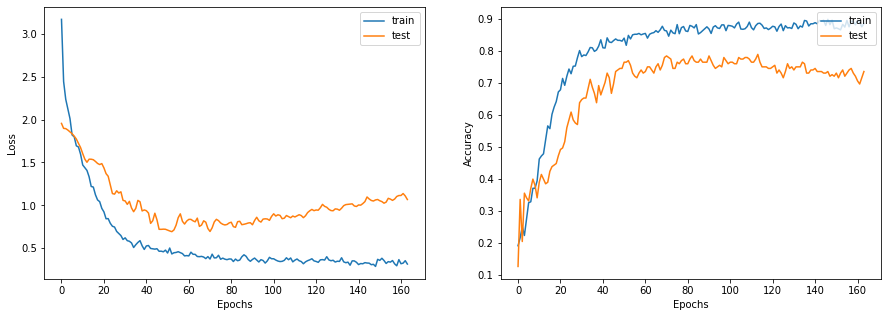

In [ ]:
display_learning_curves(history)


In [ ]:
_, test_accuracy = baseline_model.evaluate(x=x_test, y=y_test, verbose=0)
print(f"Test accuracy: {round(test_accuracy * 100, 2)}%")

Test accuracy: 69.96%


In [ ]:

def generate_random_instances(num_instances):
    token_probability = x_train.mean(axis=0)
    instances = []
    for _ in range(num_instances):
        probabilities = np.random.uniform(size=len(token_probability))
        instance = (probabilities <= token_probability).astype(int)
        instances.append(instance)

    return np.array(instances)


def display_class_probabilities(probabilities):
    for instance_idx, probs in enumerate(probabilities):
        print(f"Instance {instance_idx + 1}:")
        for class_idx, prob in enumerate(probs):
            print(f"- {class_values[class_idx]}: {round(prob * 100, 2)}%")


In [ ]:
new_instances = generate_random_instances(num_classes)
logits = baseline_model.predict(new_instances)
probabilities = keras.activations.softmax(tf.convert_to_tensor(logits)).numpy()
display_class_probabilities(probabilities)

Starting GCN

In [ ]:
data_values = data.drop("labels", axis=1)
data_values = data_values.to_numpy()
data_values

array([[-2.2878773 , -0.28797287, -1.5217429 , ...,  0.18575718,
        -1.1212428 ,  0.26833567],
       [-1.3207126 ,  0.6791125 , -0.095128  , ..., -1.8642751 ,
        -0.08226249,  0.22712526],
       [-1.3207126 ,  0.6791125 , -0.095128  , ..., -1.8642751 ,
        -0.08226249,  0.22712526],
       ...,
       [ 0.05462141,  0.36900425, -0.2479943 , ..., -0.4886    ,
        -0.46091428,  0.01332857],
       [ 0.00702503, -0.1681    , -2.54319   , ..., -0.49480003,
        -2.08793   ,  2.409375  ],
       [-0.09941428,  0.20495711,  0.11341786, ..., -0.25848442,
        -1.0006572 ,  0.6269743 ]])

In [ ]:
# Create an edges array (sparse adjacency matrix) of shape [2, num_edges].
edges = matrix[["source", "target"]].to_numpy().T
# Create an edge weights array of ones.
edge_weights = tf.ones(shape=edges.shape[1])
# Create a node features array of shape [num_nodes, num_features].
node_features = tf.cast(
    data_values , dtype=tf.dtypes.float32
)
# Create graph info tuple with node_features, edges, and edge_weights.
graph_info = (node_features, edges, edge_weights)

print("Edges shape:", edges.shape)
print("Nodes shape:", node_features.shape)

Edges shape: (2, 2143576)
Nodes shape: (4999, 300)


In [ ]:
papers.sort_values("paper_id")[feature_names].to_numpy()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
edge_weights

<tf.Tensor: shape=(2143576,), dtype=float32, numpy=array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)>

In [ ]:

class GraphConvLayer(layers.Layer):
    def __init__(
        self,
        hidden_units,
        dropout_rate=0.2,
        aggregation_type="mean",
        combination_type="concat",
        normalize=False,
        *args,
        **kwargs,
    ):
        super(GraphConvLayer, self).__init__(*args, **kwargs)

        self.aggregation_type = aggregation_type
        self.combination_type = combination_type
        self.normalize = normalize

        self.ffn_prepare = create_ffn(hidden_units, dropout_rate)
        if self.combination_type == "gated":
            self.update_fn = layers.GRU(
                units=hidden_units,
                activation="tanh",
                recurrent_activation="sigmoid",
                dropout=dropout_rate,
                return_state=True,
                recurrent_dropout=dropout_rate,
            )
        else:
            self.update_fn = create_ffn(hidden_units, dropout_rate)

    def prepare(self, node_repesentations, weights=None):
        # node_repesentations shape is [num_edges, embedding_dim].
        messages = self.ffn_prepare(node_repesentations)
        if weights is not None:
            messages = messages * tf.expand_dims(weights, -1)
        return messages

    def aggregate(self, node_indices, neighbour_messages):
        # node_indices shape is [num_edges].
        # neighbour_messages shape: [num_edges, representation_dim].
        num_nodes = tf.math.reduce_max(node_indices) + 1
        if self.aggregation_type == "sum":
            aggregated_message = tf.math.unsorted_segment_sum(
                neighbour_messages, node_indices, num_segments=num_nodes
            )
        elif self.aggregation_type == "mean":
            aggregated_message = tf.math.unsorted_segment_mean(
                neighbour_messages, node_indices, num_segments=num_nodes
            )
        elif self.aggregation_type == "max":
            aggregated_message = tf.math.unsorted_segment_max(
                neighbour_messages, node_indices, num_segments=num_nodes
            )
        else:
            raise ValueError(f"Invalid aggregation type: {self.aggregation_type}.")

        return aggregated_message

    def update(self, node_repesentations, aggregated_messages):
        # node_repesentations shape is [num_nodes, representation_dim].
        # aggregated_messages shape is [num_nodes, representation_dim].
        if self.combination_type == "gru":
            # Create a sequence of two elements for the GRU layer.
            h = tf.stack([node_repesentations, aggregated_messages], axis=1)
        elif self.combination_type == "concat":
            # Concatenate the node_repesentations and aggregated_messages.
            h = tf.concat([node_repesentations, aggregated_messages], axis=1)
        elif self.combination_type == "add":
            # Add node_repesentations and aggregated_messages.
            h = node_repesentations + aggregated_messages
        else:
            raise ValueError(f"Invalid combination type: {self.combination_type}.")

        # Apply the processing function.
        node_embeddings = self.update_fn(h)
        if self.combination_type == "gru":
            node_embeddings = tf.unstack(node_embeddings, axis=1)[-1]

        if self.normalize:
            node_embeddings = tf.nn.l2_normalize(node_embeddings, axis=-1)
        return node_embeddings

    def call(self, inputs):
        """Process the inputs to produce the node_embeddings.

        inputs: a tuple of three elements: node_repesentations, edges, edge_weights.
        Returns: node_embeddings of shape [num_nodes, representation_dim].
        """

        node_repesentations, edges, edge_weights = inputs
        # Get node_indices (source) and neighbour_indices (target) from edges.
        node_indices, neighbour_indices = edges[0], edges[1]
        # neighbour_repesentations shape is [num_edges, representation_dim].
        neighbour_repesentations = tf.gather(node_repesentations, neighbour_indices)

        # Prepare the messages of the neighbours.
        neighbour_messages = self.prepare(neighbour_repesentations, edge_weights)
        # Aggregate the neighbour messages.
        aggregated_messages = self.aggregate(node_indices, neighbour_messages)
        # Update the node embedding with the neighbour messages.
        return self.update(node_repesentations, aggregated_messages)


In [ ]:

class GNNNodeClassifier(tf.keras.Model):
    def __init__(
        self,
        graph_info,
        num_classes,
        hidden_units,
        aggregation_type="sum",
        combination_type="concat",
        dropout_rate=0.2,
        normalize=True,
        *args,
        **kwargs,
    ):
        super(GNNNodeClassifier, self).__init__(*args, **kwargs)

        # Unpack graph_info to three elements: node_features, edges, and edge_weight.
        node_features, edges, edge_weights = graph_info
        self.node_features = node_features
        self.edges = edges
        self.edge_weights = edge_weights
        # Set edge_weights to ones if not provided.
        if self.edge_weights is None:
            self.edge_weights = tf.ones(shape=edges.shape[1])
        # Scale edge_weights to sum to 1.
        self.edge_weights = self.edge_weights / tf.math.reduce_sum(self.edge_weights)

        # Create a process layer.
        self.preprocess = create_ffn(hidden_units, dropout_rate, name="preprocess")
        # Create the first GraphConv layer.
        self.conv1 = GraphConvLayer(
            hidden_units,
            dropout_rate,
            aggregation_type,
            combination_type,
            normalize,
            name="graph_conv1",
        )
        # Create the second GraphConv layer.
        self.conv2 = GraphConvLayer(
            hidden_units,
            dropout_rate,
            aggregation_type,
            combination_type,
            normalize,
            name="graph_conv2",
        )
        # Create a postprocess layer.
        self.postprocess = create_ffn(hidden_units, dropout_rate, name="postprocess")
        # Create a compute logits layer.
        self.compute_logits = layers.Dense(units=num_classes, name="logits")

    def call(self, input_node_indices):
        # Preprocess the node_features to produce node representations.
        x = self.preprocess(self.node_features)
        # Apply the first graph conv layer.
        x1 = self.conv1((x, self.edges, self.edge_weights))
        # Skip connection.
        x = x1 + x
        # Apply the second graph conv layer.
        x2 = self.conv2((x, self.edges, self.edge_weights))
        # Skip connection.
        x = x2 + x
        # Postprocess node embedding.
        x = self.postprocess(x)
        # Fetch node embeddings for the input node_indices.
        node_embeddings = tf.gather(x, input_node_indices)
        # Compute logits
        return self.compute_logits(node_embeddings)


In [ ]:
graph_info

(<tf.Tensor: shape=(4999, 300), dtype=float32, numpy=
 array([[-2.2878773 , -0.28797287, -1.5217429 , ...,  0.18575718,
         -1.1212428 ,  0.26833567],
        [-1.3207126 ,  0.6791125 , -0.095128  , ..., -1.8642751 ,
         -0.08226249,  0.22712526],
        [-1.3207126 ,  0.6791125 , -0.095128  , ..., -1.8642751 ,
         -0.08226249,  0.22712526],
        ...,
        [ 0.05462141,  0.36900425, -0.2479943 , ..., -0.4886    ,
         -0.46091428,  0.01332857],
        [ 0.00702503, -0.1681    , -2.54319   , ..., -0.49480003,
         -2.08793   ,  2.409375  ],
        [-0.09941428,  0.20495711,  0.11341786, ..., -0.25848442,
         -1.0006572 ,  0.6269743 ]], dtype=float32)>,
 array([[   0,    0,    0, ..., 4998, 4998, 4998],
        [4993, 4994, 4995, ..., 4995, 4996, 4997]]),
 <tf.Tensor: shape=(2143576,), dtype=float32, numpy=array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)>)

In [ ]:
gnn_model = GNNNodeClassifier(
    graph_info=graph_info,
    num_classes=40,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    name="gnn_model",
)

print("GNN output shape:", gnn_model([1, 10, 100]))

gnn_model.summary()

GNN output shape: tf.Tensor(
[[ 4.26365137e-02 -2.01387256e-01 -6.80237949e-01  6.07649684e-01
   3.38172853e-01 -5.60002029e-01 -5.37370384e-01 -2.93041766e-01
   1.04725473e-01 -9.64624047e-01 -4.33581144e-01 -1.43114865e-01
  -3.75885516e-02  5.64190805e-01 -1.89363003e-01  1.51146606e-01
   4.05361176e-01  1.48457885e-02 -2.72529811e-01 -5.86919188e-01
   7.56714642e-02  1.73543483e-01 -1.57537311e-01  2.38992959e-01
   1.07262865e-01 -5.87545276e-01  1.92895204e-01 -2.12473169e-01
  -2.34584570e-01  2.35838369e-02  1.01692036e-01  1.79523230e-01
  -1.00949273e-01 -5.37979901e-01 -1.13483667e+00 -2.33965278e-01
  -8.40840936e-01  2.32836753e-01  4.11821187e-01  5.84780574e-02]
 [-1.10567555e-01 -3.20161700e-01 -4.87859935e-01  3.30292881e-01
  -2.27636516e-01 -1.52001143e-01 -3.01042616e-01 -2.33068004e-01
  -8.36676806e-02 -4.56683576e-01 -3.42350274e-01  1.28547668e-01
  -2.98000090e-02  3.89730185e-01 -9.92677361e-02 -7.61648715e-02
   2.46859193e-01 -6.56457320e-02 -2.02479362e

In [ ]:
x = data.drop("labels", axis=1)
y = labels["medical_specialty"]

In [ ]:
x["paper_id"] = list(range(x.shape[0]))
x

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,paper_id
0,-2.287877,-0.287973,-1.521743,-1.554829,2.775943,0.261533,3.043169,5.266857,0.247843,0.050934,...,1.050389,-2.188976,-1.096760,0.024409,0.057076,1.054010,0.185757,-1.121243,0.268336,0
1,-1.320713,0.679113,-0.095128,0.232350,1.077068,-0.231363,-1.120977,1.691350,-2.450575,0.907428,...,0.316975,-0.297205,0.501525,-0.709557,0.659842,0.929122,-1.864275,-0.082262,0.227125,1
2,-1.320713,0.679113,-0.095128,0.232350,1.077068,-0.231363,-1.120977,1.691350,-2.450575,0.907428,...,0.316975,-0.297205,0.501525,-0.709557,0.659842,0.929122,-1.864275,-0.082262,0.227125,2
3,-0.223575,0.568375,0.887393,-1.218675,-1.491250,-2.523225,2.791048,2.556195,-2.299468,-0.425512,...,6.036525,3.387875,-2.733390,-2.201047,4.424937,-0.711307,-3.157555,-3.902398,3.797171,3
4,0.626490,1.289600,4.356650,-2.501195,1.166310,-4.525900,1.089620,0.322065,-0.267900,-0.128519,...,3.585820,6.835500,-5.521365,-3.112185,0.872715,-0.858750,-2.079950,-3.495985,1.820290,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,0.433013,1.637330,-1.719637,0.369225,2.395396,-1.644646,1.306417,3.475423,-1.141666,2.751727,...,-1.015509,1.774573,-1.328297,-1.297127,0.564502,2.039783,-1.600203,-2.009870,0.594881,4994
4995,-0.003589,0.786140,-0.867227,-0.904391,0.947182,-0.510977,0.625115,1.759712,0.232307,0.838400,...,-0.424286,-0.014863,-0.749341,-0.793227,0.098484,0.666659,0.298413,-0.350319,0.023992,4995
4996,0.054621,0.369004,-0.247994,-0.955429,0.677160,-0.093177,0.446710,1.528471,-0.962321,0.672103,...,-0.294946,-0.802692,-0.349630,0.137793,-0.199186,0.434250,-0.488600,-0.460914,0.013329,4996
4997,0.007025,-0.168100,-2.543190,0.122665,2.641253,-0.181732,1.490208,3.477475,-1.324905,0.886550,...,-0.477325,-1.888615,-1.491085,-2.517825,0.096875,0.947075,-0.494800,-2.087930,2.409375,4997


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=5)

In [ ]:
x_train = x_train["paper_id"].to_numpy()
print(x_train.shape)
print(y_train.shape)

(3999,)
(3999,)


In [ ]:
history = run_experiment(gnn_model, x_train, y_train)


Epoch 1/300
14/14 [==============================] - 16s 564ms/step - loss: 3.3718 - acc: 0.1424 - val_loss: 3.4237 - val_acc: 0.1117
Epoch 2/300
14/14 [==============================] - 6s 466ms/step - loss: 3.0392 - acc: 0.2136 - val_loss: 3.3616 - val_acc: 0.1350
Epoch 3/300
14/14 [==============================] - 7s 467ms/step - loss: 2.9480 - acc: 0.2292 - val_loss: 3.1359 - val_acc: 0.2200
Epoch 4/300
14/14 [==============================] - 7s 466ms/step - loss: 2.8738 - acc: 0.2498 - val_loss: 2.8950 - val_acc: 0.2533
Epoch 5/300
14/14 [==============================] - 7s 467ms/step - loss: 2.8055 - acc: 0.2698 - val_loss: 2.7899 - val_acc: 0.2867
Epoch 6/300
14/14 [==============================] - 7s 468ms/step - loss: 2.7322 - acc: 0.2839 - val_loss: 2.7414 - val_acc: 0.2967
Epoch 7/300
14/14 [==============================] - 7s 467ms/step - loss: 2.6175 - acc: 0.2942 - val_loss: 2.7544 - val_acc: 0.2733
Epoch 8/300
14/14 [==============================] - 7s 467ms/step -

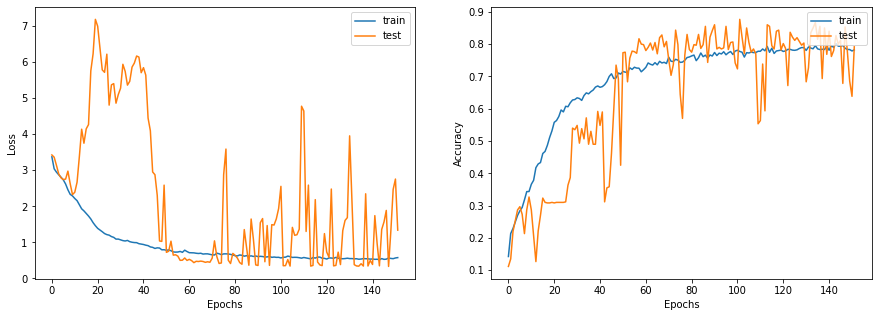

In [ ]:
  display_learning_curves(history)

In [ ]:
# x_test = x_test.paper_id.to_numpy()
_, test_accuracy = gnn_model.evaluate(x=x_test, y=y_test, verbose=0)
print(f"Test accuracy: {round(test_accuracy * 100, 2)}%")

Test accuracy: 85.4%


In [ ]:
y_predict = gnn_model.predict(x_test)

In [ ]:
pd.DataFrame(y_predict)

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-11.923907,-8.444425,0.146748,-6.853287,-12.098669,15.419380,-4.469851,7.908218,-10.533609,1.904213,...,5.090139,-6.084918,-7.745176,1.176648,-11.866815,-8.444234,-6.829594,-10.257789,-10.915765,-6.179164
1,-12.791596,-16.505472,-13.181027,-9.978211,-12.605290,-2.547537,20.740660,-5.055701,-16.128611,16.768255,...,-12.559322,-16.757137,8.019148,3.189899,-12.797797,-15.793943,-17.705158,1.847832,-11.391684,-12.522538
2,-19.714911,-13.533144,3.673508,-5.179226,-18.674713,1.335545,-7.265021,34.530148,-13.156814,-6.784097,...,-6.614653,-11.481757,-15.396127,-12.732237,-19.811775,-10.166503,-8.958210,-5.463295,-13.619810,-10.641996
3,1.820673,4.125284,-8.288614,-4.063364,3.815129,-6.715915,-5.906645,-6.585314,2.834110,-6.047489,...,-1.907720,3.610971,-1.228245,-3.096472,2.920150,4.133204,3.883986,-2.962316,2.071648,2.237336
4,-1.951939,-0.767881,-6.655246,4.741388,-4.706109,-22.373558,-12.753487,-5.986542,-0.322649,-24.264536,...,-16.133575,-0.685068,-17.284378,-24.723679,-2.784117,-0.295171,-1.972441,-1.707135,-1.964413,-2.452897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-20.183353,-13.883992,3.811384,-5.248250,-19.121124,1.215362,-7.392587,35.352482,-13.470346,-6.924746,...,-6.842591,-11.795133,-15.740345,-13.042125,-20.299129,-10.422917,-9.190650,-5.532929,-13.940869,-10.931403
996,-8.495214,-4.341150,-8.392334,-0.188031,-8.948840,-18.873442,-9.005341,11.096628,-5.322159,-16.900976,...,-13.386852,-5.987245,-14.548587,-21.252378,-9.302366,-1.824804,-4.721990,-1.787410,-7.148782,-7.446781
997,-20.015104,-13.760761,3.749499,-5.212744,-18.962017,1.241737,-7.336197,35.066708,-13.360013,-6.880554,...,-6.770908,-11.686491,-15.620470,-12.948176,-20.124008,-10.328351,-9.110982,-5.500338,-13.828360,-10.832393
998,-3.042652,-3.605785,-13.422469,-10.598965,-2.833933,-4.253085,2.617627,-7.460352,-4.812629,5.142353,...,-2.081070,-4.240193,8.579259,6.126179,-2.573082,-3.564949,-5.277135,-4.876772,-2.476506,-4.379567


In [ ]:
y_predict[0]

array([-11.923907  ,  -8.444425  ,   0.14674848,  -6.853287  ,
       -12.098669  ,  15.41938   ,  -4.4698515 ,   7.9082184 ,
       -10.533609  ,   1.9042134 ,  -8.7768545 , -11.532323  ,
        -8.085801  ,  -9.46097   ,  -9.518305  , -11.862498  ,
        -7.840616  ,  -8.189096  , -13.106112  ,  -3.6921651 ,
        -8.684481  ,  14.884194  ,  -3.374688  ,   3.0841117 ,
        -7.7427297 ,  -8.466957  ,  -8.3865595 , -11.007521  ,
         3.8302133 ,   7.4680247 ,   5.090139  ,  -6.0849175 ,
        -7.7451763 ,   1.176648  , -11.866815  ,  -8.444234  ,
        -6.829594  , -10.257789  , -10.915765  ,  -6.1791644 ],
      dtype=float32)

In [ ]:
max_predicted = []
for i in y_predict:
  max_predicted.append(np.argmax(i))

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sn
from sklearn.preprocessing import MinMaxScaler

In [ ]:
accuracy_score(y_test, max_predicted)

0.854

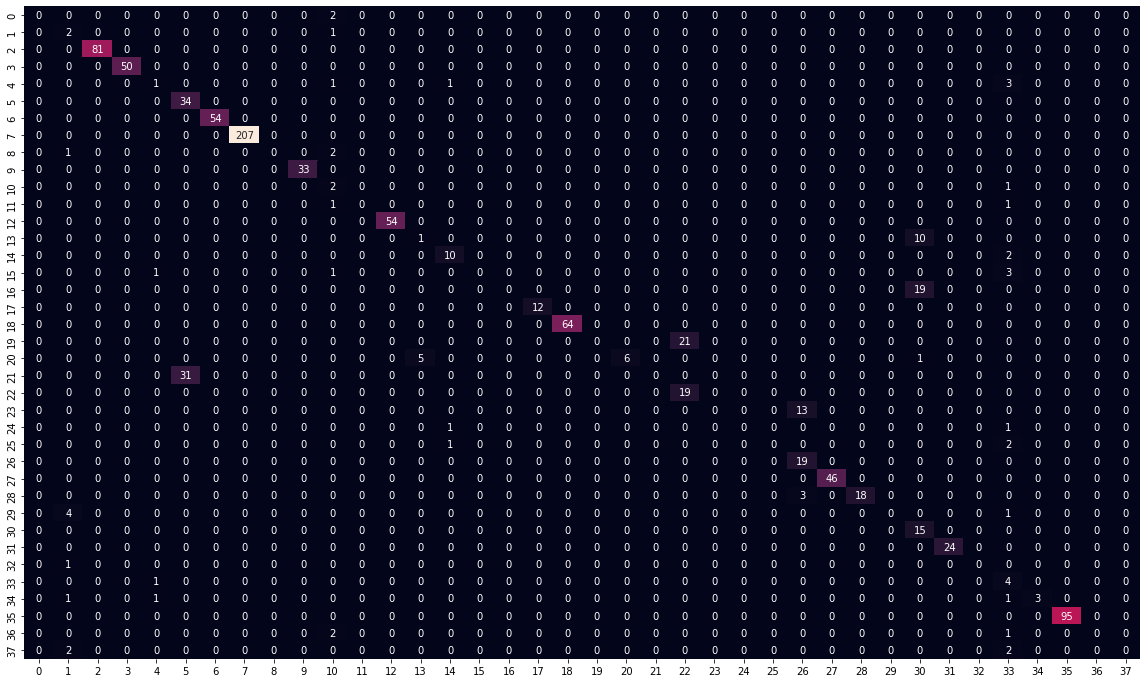

In [ ]:
plt.figure(figsize=(20, 12))
cf = confusion_matrix(y_test, max_predicted)
sn.heatmap(cf, annot=True, fmt="d", cbar=False)

In [ ]:
minmax = MinMaxScaler().fit(list(range(40)))
fpr, tpr, thresholds = roc_curve(y_test, max_predicted)
plt.plot(minmax.transform(fpr), minmax.transform(tpr))
plt.x_label("False positive rate")
plt.y_label("True positive rate")

In [ ]:
minmax = MinMaxScaler().fit(list(range(40)))

ValueError: ignored